<a href="https://colab.research.google.com/github/kmrasmussen/cell_project/blob/main/Section_2_1_Gaussian_Mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian mixture

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import umap
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.decomposition import PCA

In [2]:
# Simulate 3 cell types sequencs in 2 different batches as Gaussian mixtures in 2D
component_means = [[-14., 8.], [15.,-30.], [78.,0.]]
component_vars = [[5.,3.], [20.,7], [13,0.7]]
batch1_mixing_coefficients = [0.2, 0.3, 0.5]
batch2_mixing_coefficients = [0.3, 0.3, 0.4]

In [3]:
def make_batch(mixing_coefficients, n_samples):
    samples = []
    labels = []
    for i in range(n_samples):
        # Select the cell type based on the mixing coefficients
        component = np.random.choice(3, p = mixing_coefficients)
        # Get mean and var
        mean = np.array(component_means[component])
        var = np.array(component_vars[component])
        # make a sample
        sample = np.random.multivariate_normal(mean, np.diag(var))
        # add sample to list of samples
        samples.append(sample)
        labels.append(component)
    return np.vstack(samples), np.array(labels)

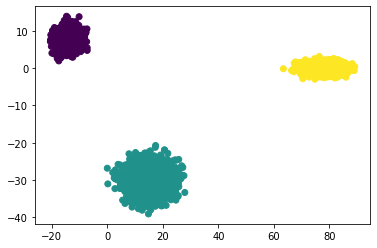

In [6]:
# Make 2 different batches based with different mixing coefficients
b1_size = 7000
b2_size = 3000
batch_1, batch_1_labels = make_batch(batch1_mixing_coefficients, b1_size)
batch_2, batch_2_labels = make_batch(batch2_mixing_coefficients, b2_size)
plt.scatter(batch_1[:,0], batch_1[:,1], c=batch_1_labels)

In [8]:
batch_1

array([[ 82.16987468,   0.51638513],
       [ 86.56114113,  -1.16335779],
       [ 13.9325012 , -28.91985584],
       ...,
       [ 82.44744721,  -0.96714555],
       [ 81.50850525,   0.49688112],
       [ 79.41753172,  -0.10987107]])

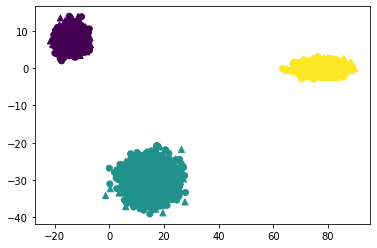

In [10]:
both_batches = np.vstack([batch_1, batch_2])
both_batches_labels = np.hstack([batch_1_labels, batch_2_labels + 3])
batch_labels = np.hstack([np.zeros(b1_size),np.ones(b2_size)])
plt.scatter(batch_1[:,0], batch_1[:,1], c=batch_1_labels, marker = 'o')
plt.scatter(batch_2[:,0], batch_2[:,1], c=batch_2_labels, marker = '^')

# Project to d = 100

In [11]:
original_dim = 2

In [12]:
projection_dim = 500

In [13]:
projection_matrix_std = 500
gauss_projection_matrix = np.random.randn(original_dim * projection_dim).reshape(projection_dim,original_dim) * projection_matrix_std

In [14]:
# Project the 2D cells into higher dimension
batch_1_projected = np.dot(gauss_projection_matrix, batch_1.T).T
batch_2_projected = np.dot(gauss_projection_matrix, batch_2.T).T
both_projected = np.vstack([batch_1_projected, batch_2_projected])

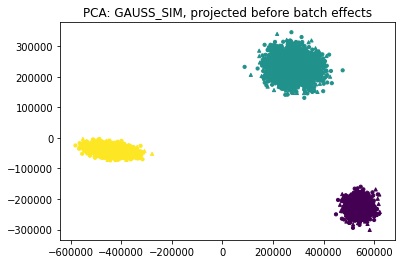

In [ ]:
# Use UMAP to plot how they end up
pca = PCA(n_components=2)
both_projected_pca = pca.fit_transform(both_projected)
plt.scatter(both_projected_pca[:7000][:,0], both_projected_pca[:7000][:,1], c=both_batches_labels[:7000], marker='o', s=10)
plt.scatter(both_projected_pca[7000:][:,0], both_projected_pca[7000:][:,1], c=both_batches_labels[7000:], marker='^', s=10)
plt.title('PCA: GAUSS_SIM, projected before batch effects')
#plt.savefig('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_plots/exp1.1.projected_no_effects_pca.png')

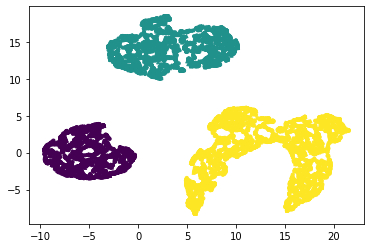

In [16]:
# Use UMAP to plot how they end up
reducer_no_effect = umap.UMAP()
both_projected_umap = reducer_no_effect.fit_transform(both_projected)
plt.scatter(both_projected_umap[:7000][:,0], both_projected_umap[:7000][:,1], c=both_batches_labels[:7000], marker='o', s=10)
plt.scatter(both_projected_umap[7000:][:,0], both_projected_umap[7000:][:,1], c=both_batches_labels[7000:], marker='^', s=10)
#plt.savefig('./experiment_plots/exp1.1.proj.nobatch.png')

## Adding batch effect vectors

In [26]:
# Model batch effects as a vector displacement for each batch
# the scaling is made in order to make sure they are separated
batch_1_scaler = 15000
batch_2_scaler = 15000
batch_1_batch_effect_vector = np.random.randn(projection_dim) * batch_1_scaler
batch_2_batch_effect_vector = np.random.randn(projection_dim) * batch_2_scaler

In [27]:
# Add the bach effect vectors to the high dim cells
batch_1_with_effect = batch_1_projected + batch_1_batch_effect_vector
batch_2_with_effect = batch_2_projected + batch_2_batch_effect_vector
both_batches_with_effect = np.vstack([batch_1_with_effect, batch_2_with_effect])

Text(0.5, 1.0, 'PCA: GAUSS_SIM, after adding batch effect')

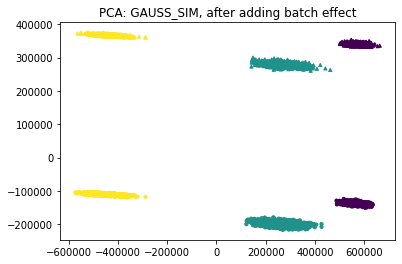

In [28]:
pca = PCA(n_components=2)
both_batches_with_effect_pca = pca.fit_transform(both_batches_with_effect)
plt.scatter(both_batches_with_effect_pca[:7000][:,0], both_batches_with_effect_pca[:7000][:,1], c=both_batches_labels[:7000], marker='o', s=10)
plt.scatter(both_batches_with_effect_pca[7000:][:,0], both_batches_with_effect_pca[7000:][:,1], c=both_batches_labels[7000:], marker='^', s=10)
plt.title('PCA: GAUSS_SIM, after adding batch effect')
#plt.savefig('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_plots/exp1.1.proj.witheffects_difficult_pca.png')

In [29]:
# Use UMAP to see how it ends up
reducer_with_effect = umap.UMAP()
both_batches_with_effect_umap = reducer_with_effect.fit_transform(both_batches_with_effect)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 1.0, 'UMAP: GAUSS_SIM, 2 batches, 3 cell types, 10k cells')

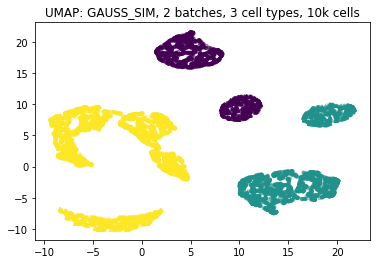

In [30]:
plt.scatter(both_batches_with_effect_umap[:7000][:,0], both_batches_with_effect_umap[:7000][:,1], c=both_batches_labels[:7000], marker='o', s=10, alpha=0.4)
plt.scatter(both_batches_with_effect_umap[7000:][:,0], both_batches_with_effect_umap[7000:][:,1], c=both_batches_labels[7000:], marker='^', s=10, alpha=0.4)
plt.title('UMAP: GAUSS_SIM, 2 batches, 3 cell types, 10k cells')
#plt.savefig('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_plots/exp1.1.proj.witheffects_difficult_umap.png')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
np.save('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_outputs/simulated_gauss1_difficult1.npy', both_batches_with_effect)

In [ ]:
np.save('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_outputs/simulated_gauss1_labels_difficult1.npy', batch_labels)

In [ ]:
np.save('/content/gdrive/My Drive/uni_archive/cell_proj/experiments/experiment_outputs/simulated_gauss1_labels2_difficult1.npy', both_batches_labels)

# IGNORE:

# Finding MNNs

The method only finds MNNs with respect to the HVG

In [ ]:
def cos_normalize(X):
    return (1 / np.linalg.norm(X, axis=1).reshape(-1,1)) * X

batch_1_with_effect = cos_normalize(batch_1_with_effect)
batch_2_with_effect = cos_normalize(batch_2_with_effect)

In [ ]:
# Split batch 1 up into two parts by selecting only the HVG columns and also only the non-HVG columns
b1_hvg = batch_1_with_effect[:,:n_highly_variable_genes]
b1_inq = batch_1_with_effect[:,n_highly_variable_genes:]
print(b1_hvg.shape, b1_inq.shape)
# Do the same for batch 2
b2_hvg = batch_2_with_effect[:,:n_highly_variable_genes]
b2_inq = batch_2_with_effect[:,n_highly_variable_genes:]
print(b2_hvg.shape, b2_inq.shape)

In [ ]:
#b1_hvg = cos_normalize(b1_hvg)
#b1_inq = cos_normalize(b1_inq)
#b2_hvg = cos_normalize(b2_hvg)
#b2_inq = cos_normalize(b2_inq)

In [ ]:
both_hvg = np.vstack([b1_hvg, b2_hvg])
both_hvg_reducer = umap.UMAP()
both_hvg_umap = both_hvg_reducer.fit_transform(both_hvg)
plt.scatter(both_hvg_umap[:,0], both_hvg_umap[:,1], c=both_batches_labels)

In [ ]:
from sklearn.neighbors import NearestNeighbors

### For each cell find the k nearest neighbors in the other batch

In [ ]:
k = 5
b1_hvg_nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(b1_hvg)
b2_hvg_nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(b2_hvg)

In [ ]:
_, indices_knearest_b2_in_b1 = b1_hvg_nbrs.kneighbors(b2_hvg)
_, indices_knearest_b1_in_b2 = b2_hvg_nbrs.kneighbors(b1_hvg)

In [ ]:
indices_knearest_b2_in_b1.shape

In [ ]:
indices_knearest_b1_in_b2.shape

### Find MNNs

In [ ]:
def find_mnns(knearest_in_batch_2, knearest_in_batch_1):
    mnns = []
    # Go through each cell in batch 1 where you know its NN in batch 2
    for i in range(knearest_in_batch_2.shape[0]):
        # Select the batch 2 NNs for that batch 1 cell
        knearest_a = knearest_in_batch_2[i,:]
        # Go through all its NNs
        for j in knearest_a:
            # Does the NN in batch 2 also have this batch 1 cell as one of its NNs?
            if i in knearest_in_batch_1[j,:]:
                #i_vec = batch_1_with_effect[i,:]
                #j_vec = batch_2_with_effect[j,:]
                #cos_dist = distance.cosine(i_vec, j_vec)
                mnns.append((i,j))
    return mnns

In [ ]:
all_mnns = find_mnns(indices_knearest_b1_in_b2, indices_knearest_b2_in_b1)

In [ ]:
len(all_mnns)

### Find batch vectors v

In [ ]:
# Find the batch vectors for both inquiry and HVG
mnns_with_batch_vectors = []
vml_inq = []
vml_hvg = []
for b1_cell_index, b2_cell_index in all_mnns:
    hvg_vector = b2_hvg[b2_cell_index,:] - b1_hvg[b1_cell_index,:]
    inq_vector = b2_inq[b2_cell_index,:] - b1_inq[b1_cell_index,:]
    vml_inq.append(inq_vector)
    vml_hvg.append(hvg_vector)
    mnns_with_batch_vectors.append((b1_cell_index, b2_cell_index, hvg_vector, inq_vector))

In [ ]:
len(mnns_with_batch_vectors)

In [ ]:
vml_inq_rows = np.vstack(vml_inq)
vml_hvg_rows = np.vstack(vml_hvg)

In [ ]:
vml_hvg_rows.shape

In [ ]:
m_indices = []
m_vecs = []
for l_index, m_index, hvg_vec, inq_vec in mnns_with_batch_vectors:
    if m_index not in m_indices:
        m_indices.append(m_index)
        m_vecs.append(b2_hvg[m_index,:])
m_vecs = np.vstack(m_vecs)
m_vecs.shape

In [ ]:
m_cell_index_lookup_dict = {}
for i in range(len(m_indices)):
    m_cell_index_lookup_dict[m_indices[i]] = i
len(m_cell_index_lookup_dict)

In [ ]:
w_hvg_xm = rbf_kernel(b2_hvg, m_vecs)
print(w_hvg_xm.shape)
#w_inq_xm = rbf_kernel(b2_inq, m_vecs)
for x_i in range(b2_size):
    if x_i > 0:
        break
    print('x_i', x_i)
    gauss_kernel_weights = []
    for b1_cell_index, b2_cell_index in all_mnns:
        gauss_kernel_weight = w_hvg_xm[x_i, m_cell_index_lookup_dict[b2_cell_index]]
        gauss_kernel_weights.append(gauss_kernel_weight)
    gauss_kernel_weights = np.array(gauss_kernel_weights)
    weighted_vml_hvg_rows = gauss_kernel_weights.reshape(-1,1) * vml_hvg_rows
    print(weighted_vml_hvg_rows.shape)
    print(weighted_vml_hvg_rows.sum(axis=0).shape)